<a href="https://colab.research.google.com/github/yangste333/Seattle-Weather/blob/main/DATA_3320_Seattle_St_Louis_Data_Preparation_Stephen_Yang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This book prepares the data gathered from the NOAA databases for data analysis.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

The data was originally gathered by Brian Fischer.

We'll start by loading the Seattle and St. Louis data sets.

In [ ]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/yangste333/Seattle-Weather/main/weather_data/seattle_rain.csv')

In [ ]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/yangste333/Seattle-Weather/main/weather_data/stl_rain.csv')

## Explore the contents of the data sets

We start with looking at the head of the Data Frame.

In [ ]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


We are focusing on PRCP, representing the precipitation, for this question.

We can also look at information on non-null values, data types, and memory to not potential issues with the datasets.

In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


We will do the same thing with the St. Louis datasets.

In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


The St. Louis dataset is significantly larger than the Seattle dataset. It may be because of different stations taking the measurements.

In [ ]:
df_stlouis['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

In [ ]:
df_stlouis['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [ ]:
df_seattle['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

We can see that there's multiple stations in the St. Louis dataset. We will determine one station that we take date and precipitation values from later.

In contrast, the Seattle dataset only has one station, so we don't have that problem.

## Convert data types, if necessary

The dates should be DATETIME objects. Currently, they're the equivalents of strings.

In [ ]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


In [ ]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [ ]:
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  54574 non-null  object        
 1   NAME     54574 non-null  object        
 2   DATE     54574 non-null  datetime64[ns]
 3   DAPR     1166 non-null   float64       
 4   MDPR     1163 non-null   float64       
 5   PRCP     53143 non-null  float64       
 6   SNOW     33167 non-null  float64       
 7   SNWD     12835 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 3.3+ MB


In [ ]:
df_stlouis.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

We can start with look at daily precipitation data for Seattle.

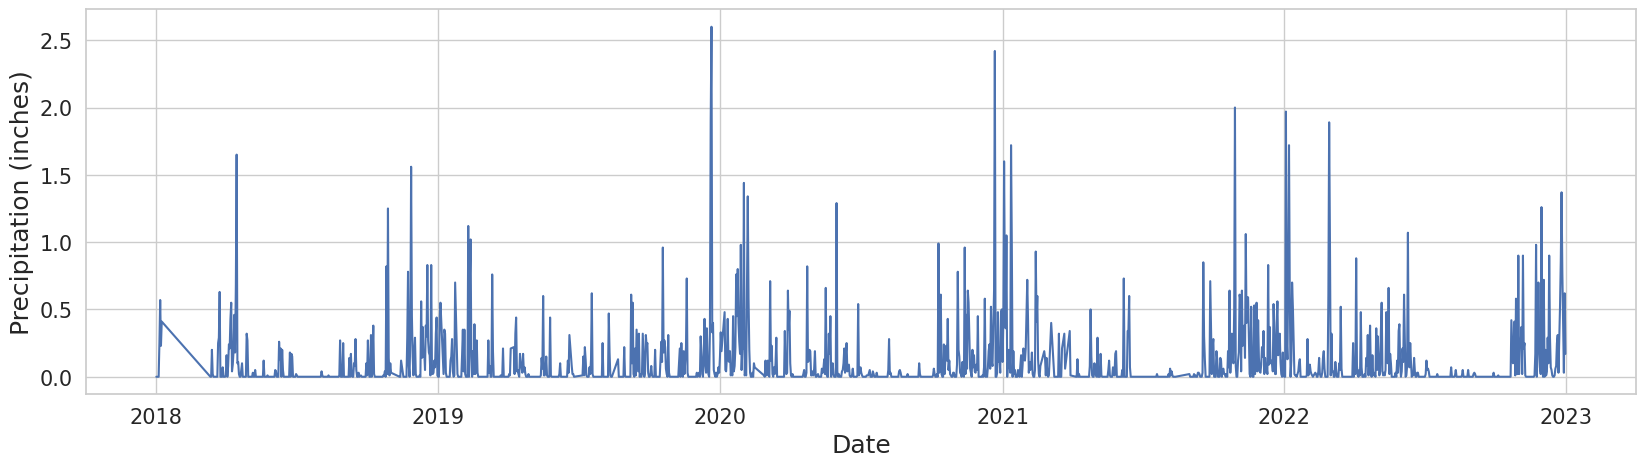

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_seattle, x = 'DATE', y = 'PRCP')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

We can clearly see that we are missing some data from Early Jan/Feb/Early March for Seattle (that's what the straight line is).

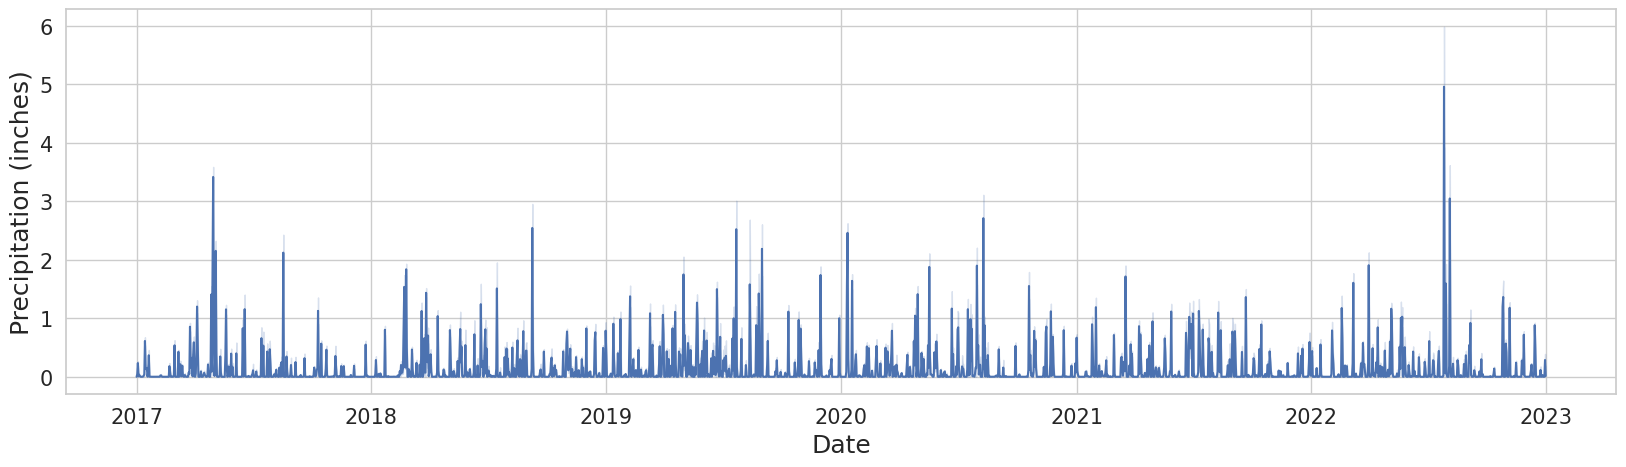

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_stlouis, x = 'DATE', y = 'PRCP')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

## Select relevant subsets of the data

**Anything we want to remove?**

We want to remove the data for a lot of stations in Missouri (we will pick the one near the airport for consistency).

Additionally, we want to take out the dates before 2018 (where the Seattle dataset starts, for consistency).

In [ ]:
df_stlouis = df_stlouis.loc[(df_stlouis['DATE'] >= '2018-01-01')]
df_stlouis

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN
...,...,...,...,...,...,...,...,...
54569,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-08,NaN,NaN,0.00,NaN,NaN
54570,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-13,NaN,NaN,0.00,0.0,NaN
54571,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-14,NaN,NaN,0.89,NaN,NaN
54572,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-15,NaN,NaN,0.36,NaN,NaN


In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45775 entries, 241 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  45775 non-null  object        
 1   NAME     45775 non-null  object        
 2   DATE     45775 non-null  datetime64[ns]
 3   DAPR     1045 non-null   float64       
 4   MDPR     1042 non-null   float64       
 5   PRCP     44514 non-null  float64       
 6   SNOW     27919 non-null  float64       
 7   SNWD     10994 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 3.1+ MB


In [ ]:
df_stlouis = df_stlouis.loc[df_stlouis['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


## Identify and deal with missing values

The missing values are determined by both:
- The values that are represented as NaN in the dataset.
- The values that are not included in the dataset (i.e. no date data in Seattle dataset).

In [ ]:
df_stlouis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 51540 to 53365
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1826 non-null   object        
 1   NAME     1826 non-null   object        
 2   DATE     1826 non-null   datetime64[ns]
 3   DAPR     0 non-null      float64       
 4   MDPR     0 non-null      float64       
 5   PRCP     1826 non-null   float64       
 6   SNOW     1826 non-null   float64       
 7   SNWD     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 128.4+ KB


In [ ]:
df_stlouis.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

There should be 1826 days (365*5 days, +1 for leap year in 2020) - so it looks like there's no missing data in this dataset.

In [ ]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1658 non-null   object        
 1   NAME     1658 non-null   object        
 2   DATE     1658 non-null   datetime64[ns]
 3   DAPR     23 non-null     float64       
 4   MDPR     23 non-null     float64       
 5   PRCP     1636 non-null   float64       
 6   SNOW     353 non-null    float64       
 7   SNWD     66 non-null     float64       
 8   WESD     15 non-null     float64       
 9   WESF     28 non-null     float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 129.7+ KB


In [ ]:
df_seattle.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1635
MDPR       1635
PRCP         22
SNOW       1305
SNWD       1592
WESD       1643
WESF       1630
dtype: int64

In contrast, the Seattle dataset looks like it's missing \~22 null values plus a bunch of days (\~200) where there's no data at all. We will deal with this later.

## Join data frames keeping `DATE` and `PRCP` columns

In [ ]:
pd.merge(df_seattle[['STATION', 'DATE', 'PRCP']], df_stlouis[['STATION', 'DATE', 'PRCP']], how = 'right', on = 'DATE')

,STATION_x,DATE,PRCP_x,STATION_y,PRCP_y
0,US1WAKG0225,2018-01-01,0.00,USW00013994,0.00
1,US1WAKG0225,2018-01-02,0.00,USW00013994,0.00
2,US1WAKG0225,2018-01-03,0.00,USW00013994,0.00
3,US1WAKG0225,2018-01-04,0.00,USW00013994,0.00
4,US1WAKG0225,2018-01-05,0.25,USW00013994,0.00
...,...,...,...,...,...
1821,US1WAKG0225,2022-12-27,0.78,USW00013994,0.00
1822,US1WAKG0225,2022-12-28,0.40,USW00013994,0.00
1823,US1WAKG0225,2022-12-29,0.03,USW00013994,0.00
1824,US1WAKG0225,2022-12-30,0.62,USW00013994,0.31


In [ ]:
merged = df_seattle[['DATE', 'PRCP']].merge(df_stlouis[['DATE', 'PRCP']], how = 'right', on = 'DATE', suffixes = ('_SEA', '_STL'))
merged

,DATE,PRCP_SEA,PRCP_STL
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.25,0.00
...,...,...,...
1821,2022-12-27,0.78,0.00
1822,2022-12-28,0.40,0.00
1823,2022-12-29,0.03,0.00
1824,2022-12-30,0.62,0.31


We're still missing values from the Seattle dataset. Since the St. Louis dataset is complete, we can visualize the missing data in the Seattle dataset by comparing it to the St. Louis dataset.

<Axes: >

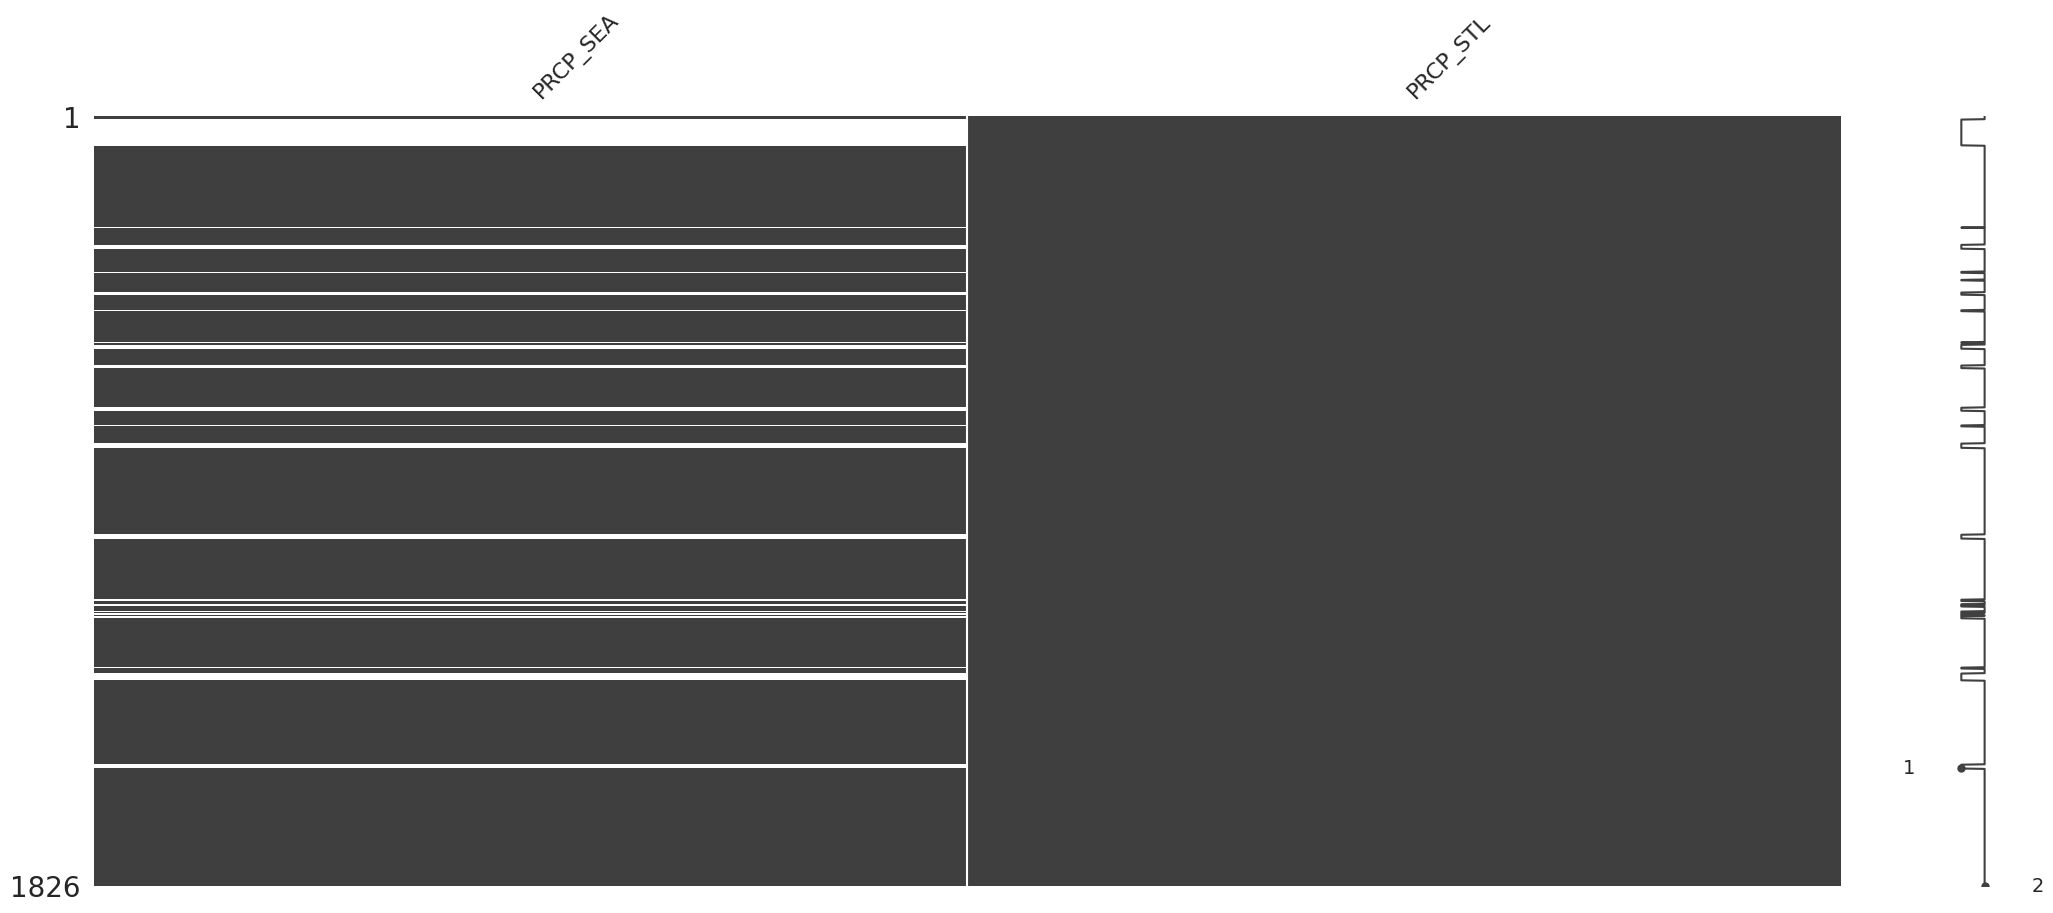

In [ ]:
msno.matrix(merged[['PRCP_SEA', 'PRCP_STL']])

## Create a tidy data frame with columns for city and precipitation

We would prefer if the data frame is in a tidy format, where each column has exactly one value (only having one column for precipitation). We currently have two columns for precipitation (this is considered "wide form").

We will "melt" the dataset to set it into a "date/city/precipitation" set.

In [ ]:
melted = pd.melt(merged, id_vars = 'DATE', var_name = 'CITY', value_name = 'PCRP')
melted

,DATE,CITY,PCRP
0,2018-01-01,PRCP_SEA,0.00
1,2018-01-02,PRCP_SEA,0.00
2,2018-01-03,PRCP_SEA,0.00
3,2018-01-04,PRCP_SEA,0.00
4,2018-01-05,PRCP_SEA,0.25
...,...,...,...
3647,2022-12-27,PRCP_STL,0.00
3648,2022-12-28,PRCP_STL,0.00
3649,2022-12-29,PRCP_STL,0.00
3650,2022-12-30,PRCP_STL,0.31


### Rename columns or values to follow best practices

We can then do some mild renaming of columns and values to make things consistent and more readable.

In [ ]:
melted.loc[melted['CITY'] == 'PRCP_SEA', 'CITY'] = 'SEA'
melted.loc[melted['CITY'] == 'PRCP_STL', 'CITY'] = 'STL'
melted

,DATE,CITY,PCRP
0,2018-01-01,SEA,0.00
1,2018-01-02,SEA,0.00
2,2018-01-03,SEA,0.00
3,2018-01-04,SEA,0.00
4,2018-01-05,SEA,0.25
...,...,...,...
3647,2022-12-27,STL,0.00
3648,2022-12-28,STL,0.00
3649,2022-12-29,STL,0.00
3650,2022-12-30,STL,0.31


In [ ]:
melted = melted.rename(columns = {'DATE' : 'date', 'CITY' : 'city', 'PCRP' : 'precipitation'})
melted

,date,city,precipitation
0,2018-01-01,SEA,0.00
1,2018-01-02,SEA,0.00
2,2018-01-03,SEA,0.00
3,2018-01-04,SEA,0.00
4,2018-01-05,SEA,0.25
...,...,...,...
3647,2022-12-27,STL,0.00
3648,2022-12-28,STL,0.00
3649,2022-12-29,STL,0.00
3650,2022-12-30,STL,0.31


# Dealing with missing values

We will take the average of the other years to get an average for the days that are missing in the SEA dataset.

In [ ]:
melted.loc[melted['city'] == 'SEA']

,date,city,precipitation
0,2018-01-01,SEA,0.00
1,2018-01-02,SEA,0.00
2,2018-01-03,SEA,0.00
3,2018-01-04,SEA,0.00
4,2018-01-05,SEA,0.25
...,...,...,...
1821,2022-12-27,SEA,0.78
1822,2022-12-28,SEA,0.40
1823,2022-12-29,SEA,0.03
1824,2022-12-30,SEA,0.62


In [ ]:
melted.loc[melted['precipitation'].isna()]

,date,city,precipitation
8,2018-01-09,SEA,NaN
9,2018-01-10,SEA,NaN
10,2018-01-11,SEA,NaN
11,2018-01-12,SEA,NaN
12,2018-01-13,SEA,NaN
...,...,...,...
1542,2022-03-23,SEA,NaN
1543,2022-03-24,SEA,NaN
1544,2022-03-25,SEA,NaN
1545,2022-03-26,SEA,NaN


For simplicity, we can make an additional column to match days ("day of year").

In [ ]:

melted['day_of_year'] = pd.DatetimeIndex(melted['date']).day_of_year
melted

,date,city,precipitation,day_of_year
0,2018-01-01,SEA,0.00,1
1,2018-01-02,SEA,0.00,2
2,2018-01-03,SEA,0.00,3
3,2018-01-04,SEA,0.00,4
4,2018-01-05,SEA,0.25,5
...,...,...,...,...
3647,2022-12-27,STL,0.00,361
3648,2022-12-28,STL,0.00,362
3649,2022-12-29,STL,0.00,363
3650,2022-12-30,STL,0.31,364


We can get a list of all of the indices where everything's missing.

In [ ]:
indices = np.where(melted['precipitation'].isna()==True)[0]
indices

array([   8,    9,   10,   11,   12,   13,   14,   15,   16,   17,   18,
         19,   20,   21,   22,   23,   24,   25,   26,   27,   28,   29,
         30,   31,   32,   33,   34,   35,   36,   37,   38,   39,   40,
         41,   42,   43,   44,   45,   46,   47,   48,   49,   50,   51,
         52,   53,   54,   55,   56,   57,   58,   59,   60,   61,   62,
         63,   64,   65,   66,   67,   68,   69,  264,  305,  306,  307,
        308,  309,  310,  311,  312,  313,  314,  369,  370,  371,  388,
        389,  418,  419,  420,  421,  422,  423,  460,  461,  462,  536,
        537,  542,  543,  544,  545,  546,  547,  548,  549,  550,  551,
        591,  592,  593,  594,  595,  596,  597,  691,  692,  693,  694,
        695,  696,  697,  698,  733,  734,  735,  776,  777,  778,  779,
        780,  781,  782,  783,  784,  785,  786,  992,  993,  994,  995,
        996,  997,  998,  999, 1000, 1001, 1146, 1147, 1148, 1149, 1157,
       1158, 1160, 1161, 1162, 1174, 1175, 1178, 11

We then create the "average per day" dataset by grouping by the day of year for Seattle and taking mean of precipitation per "day of year" calculated.

In [ ]:
mean_day_precipitation = melted.loc[melted['city'] == 'SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()
mean_day_precipitation.head(10)

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
6,0.813333
7,0.607500
8,0.240000
9,0.147500


Keep in mind that because of leap years, certain days are shifted one day back/forth compared to other days.

Since we're mostly doing averaging across similar days, it doesn't exactly matter how it works. We will just worry about that standard metric: "days from Jan 1".

In [ ]:
for _, index in enumerate(indices):
  melted.loc[index, 'precipitation'] = mean_day_precipitation.loc[melted['day_of_year'].loc[index]][0]
melted

,date,city,precipitation,day_of_year
0,2018-01-01,SEA,0.00,1
1,2018-01-02,SEA,0.00,2
2,2018-01-03,SEA,0.00,3
3,2018-01-04,SEA,0.00,4
4,2018-01-05,SEA,0.25,5
...,...,...,...,...
3647,2022-12-27,STL,0.00,361
3648,2022-12-28,STL,0.00,362
3649,2022-12-29,STL,0.00,363
3650,2022-12-30,STL,0.31,364


In [ ]:
melted[melted['precipitation'].isna()]

,date,city,precipitation,day_of_year


Now we don't have any null values left in the dataset. We're good for now!

## Create relevant derived variables as new columns

Our current goal is to determine where has more rain. There's a few ways we can answer this:
- Take the mean precipitation for each location and compare them.
- Take a mean per predetermined group, i.e. per month or per season, and compare those.
- Compare the two locations directly, day-to-day, and see if there's general trends.
- Look at the difference in precipitation between the two locations specifically, and look at either how many days had more rain than the other or the mean of the differences.
- Look at the number of rainy days for each (>0 precipitation, or precipitation > a certain threshold).
- Histogram of the amount of precipitation for each city?

Either way, there's not any additional significant variables we need to calculate at the moment. For convenience's sake, though, we can add a column for "month" and "year", in case we want to group by that.

In [ ]:
melted['month'] = pd.DatetimeIndex(melted['date']).month
melted['year'] = pd.DatetimeIndex(melted['date']).year
melted

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,SEA,0.00,1,1,2018
1,2018-01-02,SEA,0.00,2,1,2018
2,2018-01-03,SEA,0.00,3,1,2018
3,2018-01-04,SEA,0.00,4,1,2018
4,2018-01-05,SEA,0.25,5,1,2018
...,...,...,...,...,...,...
3647,2022-12-27,STL,0.00,361,12,2022
3648,2022-12-28,STL,0.00,362,12,2022
3649,2022-12-29,STL,0.00,363,12,2022
3650,2022-12-30,STL,0.31,364,12,2022


## Export the clean .csv file

In [ ]:
from google.colab import files

melted['date', 'city', 'precipitation'].to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False)
files.download('clean_seattle_stl_weather.csv')